## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# create a feature that tracks how often a name occurs. as the saying goes "success breeds success"
# https://www.statology.org/pandas-add-count-column/
application_df['NAME_COUNT'] = application_df.groupby('NAME')['NAME'].transform('count')

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' and a few others
# drop_columns = ['EIN', 'NAME', 'STATUS', 'USE_CASE', 'INCOME_AMT']
drop_columns = ['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS']
application_df.drop(columns=drop_columns, inplace=True)

In [4]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

# use apply function instead of the for loop
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(lambda x: 'Other' if x in application_types_to_replace else x)

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_keep = ['C1000', 'C2000', 'C1200', 'C3000', 'C2100']
#classifications_to_keep = ['C1000', 'C2000', 'C2100']

# Replace in dataframe
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].apply(lambda x: 'Other' if x not in classifications_to_keep else x)

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [6]:
#function to bin income to less100K or greater than 100K
def bin_income(income):
    less_than = ['0', '1-9999', '10000-24999', '25000-99999']
    if income in less_than:
        return '0-100K'
    else:
        return '100K-50M'

# Replace in dataframe
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].apply(bin_income)
#application_df['INCOME_AMT'].apply(bin_income)

# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

INCOME_AMT
0-100K      29406
100K-50M     4893
Name: count, dtype: int64

In [7]:
# consildate the affliations
application_df['AFFILIATION'] = application_df['AFFILIATION'].apply(lambda x: 'Other' if x != 'Independent' else x)

In [8]:
# consildate the use cases
application_df['USE_CASE'] = application_df['USE_CASE'].apply(lambda x: 'Other' if x != 'Preservation' else x)

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
cat_columns = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
#print("Category Columns:", application_df[cat_columns].nunique())

enc = OneHotEncoder(sparse_output=False)
enc_data = enc.fit_transform(application_df[cat_columns])
enc_columns = enc.get_feature_names_out().tolist()

encode_df = pd.DataFrame(enc_data, columns=enc_columns)
#display(encode_df.head())

# now lets merge the into the application dataframe then drop original columns
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(columns=cat_columns)

print(application_df.columns)

application_df.head()

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'NAME_COUNT', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'AFFILIATION_Independent',
       'AFFILIATION_Other', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_Other', 'USE_CASE_Preservation',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0-100K',
       'INCOME_AMT_100K-50M'],
      dtype='object')


,ASK_AMT,IS_SUCCESSFUL,NAME_COUNT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0-100K,INCOME_AMT_100K-50M
0,5000,1,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,5000,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,142590,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns='IS_SUCCESSFUL')
#X = application_df[top_features]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

# show the class balance
y.value_counts(normalize=True)

IS_SUCCESSFUL
1    0.532406
0    0.467594
Name: proportion, dtype: float64

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# set the number of features
number_input_features = X_train.shape[1]

print("Number of Input Features:", number_input_features)

Number of Input Features: 27


## Train an xgboost model to get feature importance and baseline performance

In [12]:
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [13]:
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train_scaled, y_train)

#Making predictions on the test set
predictions = model.predict(X_test_scaled)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")

print(classification_report(y_test, predictions))

Accuracy: 0.7826239067055394

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      4045
           1       0.75      0.89      0.81      4530

    accuracy                           0.78      8575
   macro avg       0.80      0.78      0.78      8575
weighted avg       0.79      0.78      0.78      8575



<BarContainer object of 20 artists>

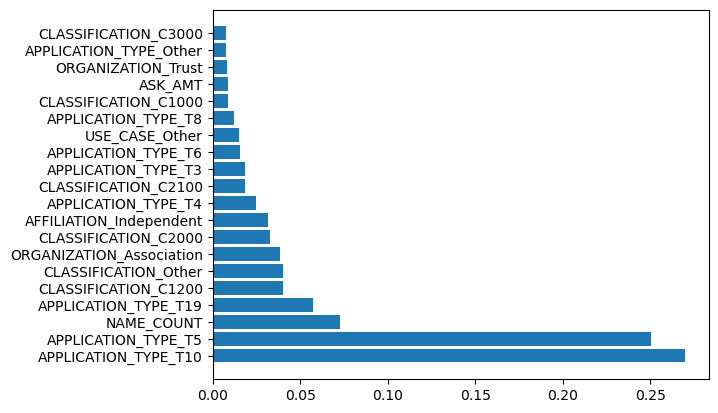

In [14]:
# plot feature importance
n_top_features = 20
sorted_idx = model.feature_importances_.argsort()[::-1]

top_features = X_test.columns[sorted_idx][:n_top_features ].tolist()

plt.barh(X_test.columns[sorted_idx][:n_top_features ], model.feature_importances_[sorted_idx][:n_top_features ])

### Use grid search on xgboost to optimize hyperparameters

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# specify model and parameter range
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=8,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(50, 500, 50),
    'learning_rate': [0.1, 0.01, 0.05]
}

# specify the grid search object
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [17]:
# run the grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=8,
                                     num_parallel_tree=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(50, 500, 50)},
             scoring='roc_auc', verbose=True)

In [18]:
# get the best model and display classification report
best_model = grid_search.best_estimator_

#Making predictions on the test set
predictions = best_model.predict(X_test_scaled)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Best XGB Model Accuracy:", accuracy)
print("\nClassification Report:")

print(classification_report(y_test, predictions))

Best XGB Model Accuracy: 0.7830903790087463

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      4045
           1       0.75      0.89      0.81      4530

    accuracy                           0.78      8575
   macro avg       0.80      0.78      0.78      8575
weighted avg       0.79      0.78      0.78      8575



In [19]:
# save the best xgb model
best_model.save_model("AlphabetSoupCharity_Optimization_XGB.json")

## Compile, Train and Evaluate the NN Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
hidden_nodes_layer1 = number_input_features*3
hidden_nodes_layer2 = number_input_features*3

activation_function = 'relu'

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=activation_function))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 81)                2268      
                                                                 
 dense_1 (Dense)             (None, 81)                6642      
                                                                 
 dense_2 (Dense)             (None, 1)                 82        
                                                                 
Total params: 8,992
Trainable params: 8,992
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
earlyStop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

#fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=16, callbacks=[earlyStop])
fit_model = nn.fit(X_train_scaled, y_train, epochs=100,  batch_size=64)

Epoch 1/100
402/402 [==============================] - 2s 3ms/step - loss: 0.5513 - accuracy: 0.7243
Epoch 2/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5289 - accuracy: 0.7374
Epoch 3/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5215 - accuracy: 0.7441
Epoch 4/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5177 - accuracy: 0.7462
Epoch 5/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5133 - accuracy: 0.7493
Epoch 6/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5101 - accuracy: 0.7504
Epoch 7/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5085 - accuracy: 0.7503
Epoch 8/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5058 - accuracy: 0.7509
Epoch 9/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.7517
Epoch 10/100
402/402 [==============================] - 1s 3ms/step - loss: 0.5029 - accura

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4916 - accuracy: 0.7563 - 515ms/epoch - 2ms/step
Loss: 0.49157628417015076, Accuracy: 0.7562682032585144


<Axes: >

<Axes: >

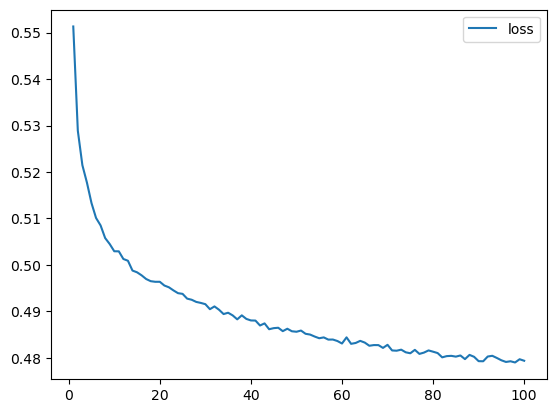

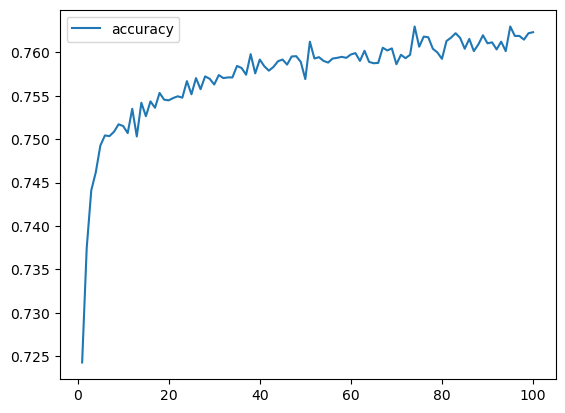

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss and
display(history_df.plot(y="loss"))
display(history_df.plot(y="accuracy"))

In [25]:
# save this model 

In [26]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=number_input_features,
        max_value=number_input_features*6,
        step=int(number_input_features/2)), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    # from 0 to 4
    for i in range(hp.Int('num_layers', 1, 3)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=number_input_features,
            max_value=number_input_features*3,
            step=int(number_input_features/2)),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [27]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=1,
    project_name='application_kt1')

In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), callbacks=[early_stop])

Trial 254 Complete [00h 01m 23s]
val_accuracy: 0.7570845484733582

Best val_accuracy So Far: 0.7627988457679749
Total elapsed time: 01h 27m 14s


In [29]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 157,
 'num_layers': 2,
 'units_0': 40,
 'units_1': 40,
 'units_2': 53,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0206'}

In [30]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4872 - accuracy: 0.7628 - 548ms/epoch - 2ms/step
Loss: 0.48721376061439514, Accuracy: 0.7627988457679749


In [31]:
#Making predictions on the test set
threshold = 0.5

predictions = best_model.predict(X_test_scaled)
predictions = predictions > threshold

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Best NN Model Accuracy:", accuracy)
print("\nClassification Report:")

print(classification_report(y_test, predictions))

268/268 [==============================] - 0s 907us/step
Best NN Model Accuracy: 0.762798833819242

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      4045
           1       0.74      0.86      0.79      4530

    accuracy                           0.76      8575
   macro avg       0.77      0.76      0.76      8575
weighted avg       0.77      0.76      0.76      8575



In [32]:
# Export our model to HDF5 file
best_model.save('AlphabetSoupCharity_Optimization.h5')